In [11]:
import pandas as pd
#%pip install scipy

df = pd.read_csv("benin-malanville.csv")  # example filename

# Summary statistics
df.describe()



,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,240.559452,167.187516,115.358961,236.589496,228.883576,28.179683,54.487969,2.121113,2.809195,0.473390,153.435172,8.582407,994.197199,0.000923,0.001905,35.246026,32.471736,NaN
std,331.131327,261.710501,158.691074,326.894859,316.536515,5.924297,28.073069,1.603466,2.029120,0.273395,102.332842,6.385864,2.474993,0.030363,0.037115,14.807258,12.348743,NaN
min,-12.900000,-7.800000,-12.600000,0.000000,0.000000,11.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,985.000000,0.000000,0.000000,9.000000,8.100000,NaN
25%,-2.000000,-0.500000,-2.100000,0.000000,0.000000,24.200000,28.800000,1.000000,1.300000,0.400000,59.000000,3.700000,993.000000,0.000000,0.000000,24.200000,23.600000,NaN
50%,1.800000,-0.100000,1.600000,4.500000,4.300000,28.000000,55.100000,1.900000,2.600000,0.500000,181.000000,8.600000,994.000000,0.000000,0.000000,30.000000,28.900000,NaN
75%,483.400000,314.200000,216.300000,463.700000,447.900000,32.300000,80.100000,3.100000,4.100000,0.600000,235.100000,12.300000,996.000000,0.000000,0.000000,46.900000,41.500000,NaN
max,1413.000000,952.300000,759.200000,1342.300000,1342.300000,43.800000,100.000000,19.500000,26.600000,4.200000,360.000000,99.400000,1003.000000,1.000000,2.500000,81.000000,72.500000,NaN


In [12]:
# Missing value report
missing = df.isna().sum()
missing[missing > 0]

# Columns with >5% missing
threshold = 0.05 * len(df)
missing[missing > threshold]
# Drop columns with >5% missing

Comments    525600
dtype: int64

In [13]:
from scipy.stats import zscore
import numpy as np

# Relevant columns
cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']



In [14]:
# Z-score method
z_scores = df[cols].apply(zscore)
outliers = (z_scores.abs() > 3) 
#View rows with outliers
df[outliers.any(axis=1)]

# Impute missing values


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
670,2021-08-09 11:11,836.0,235.0,610.6,778.8,783.8,30.3,68.2,3.2,4.1,0.7,190.5,18.4,999,0,0.0,63.0,52.7,NaN
671,2021-08-09 11:12,1274.0,698.8,615.2,1210.3,1210.3,30.1,69.6,3.4,4.1,0.6,175.8,13.3,999,0,0.0,63.7,53.1,NaN
672,2021-08-09 11:13,938.0,340.1,612.8,891.1,891.1,30.4,68.4,3.4,4.6,0.9,171.5,11.9,999,0,0.0,65.8,54.3,NaN
673,2021-08-09 11:14,718.5,126.8,593.2,682.6,682.6,30.6,68.2,4.7,5.6,0.6,160.7,8.0,999,0,0.0,65.4,54.2,NaN
674,2021-08-09 11:15,1349.0,771.8,618.0,1281.5,1281.5,30.9,67.1,4.0,4.6,0.4,169.1,12.3,999,0,0.0,65.0,53.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525141,2022-08-08 16:22,4.6,-0.1,4.6,6.1,5.9,21.9,99.0,7.1,9.7,1.2,127.8,10.7,995,0,0.2,22.8,22.0,NaN
525142,2022-08-08 16:23,4.6,0.2,4.6,5.9,5.8,21.9,99.0,6.5,9.2,1.2,126.3,12.3,995,0,0.2,22.8,22.0,NaN
525143,2022-08-08 16:24,4.5,-0.1,4.5,5.8,5.7,21.9,99.0,6.7,8.9,1.1,132.0,8.1,995,0,0.2,22.7,22.0,NaN
525151,2022-08-08 16:32,4.7,-0.1,4.8,6.0,5.9,22.0,99.1,7.3,8.7,0.8,146.9,8.8,995,0,0.1,22.8,22.0,NaN


In [15]:
df[cols] = df[cols].fillna(df[cols].median())

df.to_csv("data/benin_clean.csv", index=False)
#save the cleaned data

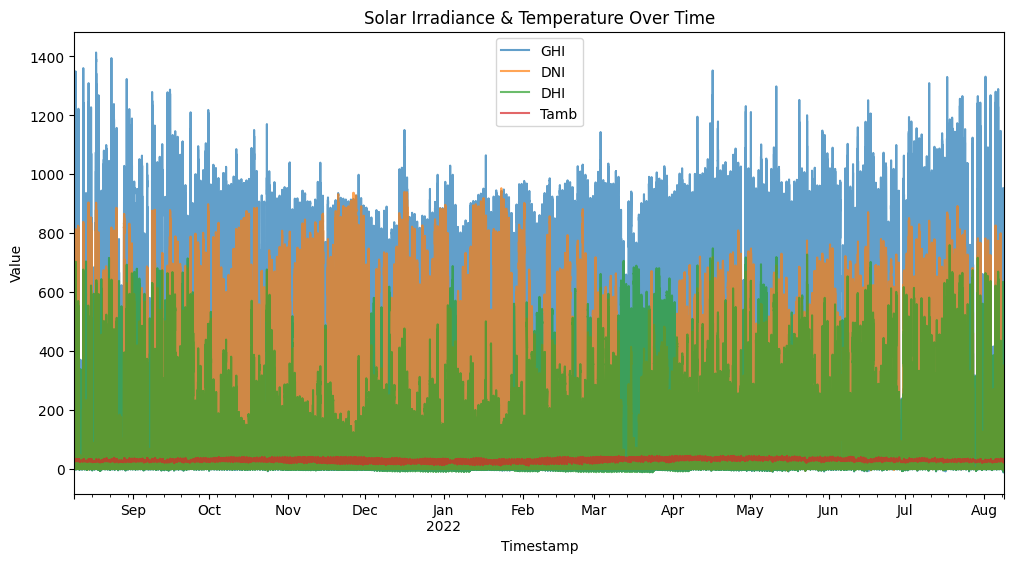

In [16]:

#%pip install matplotlib
import matplotlib.pyplot as plt
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
# Plot GHI, DNI, DHI, Tamb over time
df[['GHI', 'DNI', 'DHI', 'Tamb']].plot(figsize=(12,6), alpha=0.7)
plt.title("Solar Irradiance & Temperature Over Time")
plt.ylabel("Value")
plt.show()


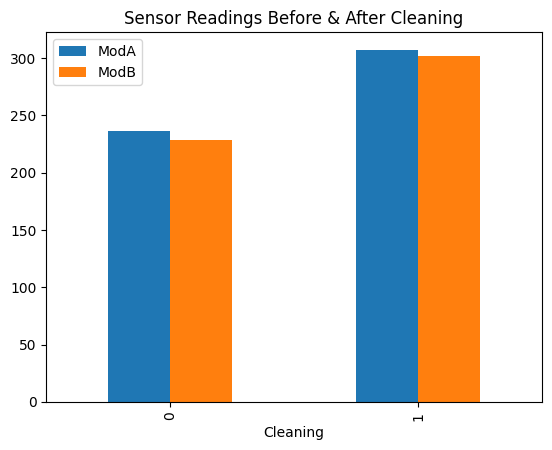

In [17]:
df.groupby('Cleaning')[['ModA', 'ModB']].mean().plot(kind='bar')
plt.title("Sensor Readings Before & After Cleaning")
plt.show()


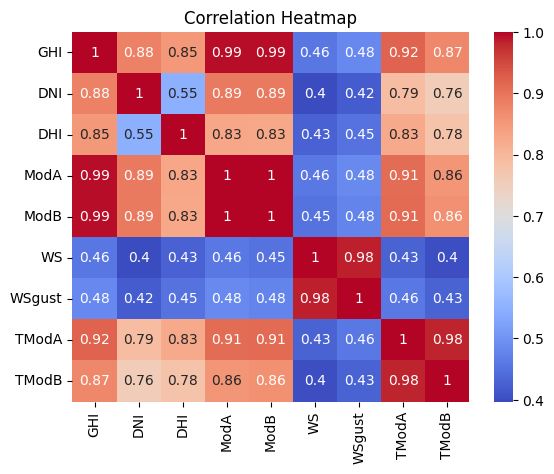

In [ ]:

#%pip install seaborn
import seaborn as sns
sns.heatmap(df[cols + ['TModA', 'TModB']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()
# Plotting histograms for each column


In [ ]:
sns.scatterplot(x='WS', y='GHI', data=df)
sns.scatterplot(x='RH', y='Tamb', data=df)
sns.scatterplot(x='RH', y='GHI', data=df)
sns.scatterplot(x='WSgust', y='GHI', data=df)
sns.scatterplot(x='WD', y='GHI', data=df)
plt.figure(figsize=(15, 10))
plt.show()


In [ ]:
%pip install windrose
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['WD'], df['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
df[['GHI', 'WS']].hist(bins=30, figsize=(10,4))
sns.scatterplot(x='RH', y='Tamb', hue='GHI', data=df)
plt.title("Scatter Plot of RH vs Tamb with GHI Color Coding")
plt.xlabel("Relative Humidity (RH)")
plt.ylabel("Ambient Temperature (Tamb)")
plt.show()


In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['GHI'], df['Tamb'], s=df['RH'], alpha=0.5)
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.title('Bubble Chart: GHI vs Tamb (Bubble = RH)')
